In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats

#import/read csv
death_data = pd.read_csv("deathdata.csv")
income_data = pd.read_csv("kaggle_income.csv")


In [2]:
death_data.head(10)

,State,State Code,Cause of death,Cause of death Code,Deaths,Population,Crude Rate
0,Alabama,1,Enterocolitis due to Clostridium difficile,A04.7,98,4874747,2
1,Alabama,1,Other and unspecified gastroenteritis and coli...,A09.0,12,4874747,Unreliable
2,Alabama,1,Gastroenteritis and colitis of unspecified origin,A09.9,40,4874747,0.8
3,Alabama,1,Septicaemia due to Staphylococcus aureus,A41.0,19,4874747,Unreliable
4,Alabama,1,Septicaemia due to other Gram-negative organisms,A41.5,14,4874747,Unreliable
5,Alabama,1,"Septicaemia, unspecified",A41.9,988,4874747,20.3
6,Alabama,1,"Bacterial infection, unspecified",A49.9,25,4874747,0.5
7,Alabama,1,Chronic viral hepatitis C,B18.2,58,4874747,1.2
8,Alabama,1,HIV disease resulting in multiple infections,B20.7,11,4874747,Unreliable
9,Alabama,1,HIV disease resulting in other specified condi...,B23.8,16,4874747,Unreliable


In [3]:
income_data.head()

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,251,10894952,909156,30.771450,-88.079697,38773,30506,33101,1638.260513
1,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,334,26070325,23254,31.708516,-85.611039,37725,19528,43789,258.017685
2,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,205,44835274,261034,33.191452,-86.615618,54606,31930,57348,926.031000
3,1011030,1,Alabama,AL,Mobile County,Satsuma,Creola city,City,place,36572,251,36878729,2374530,30.874343,-88.009442,63919,52814,47707,378.114619
4,1011040,1,Alabama,AL,Mobile County,Dauphin Island,Dauphin Island,Town,place,36528,251,16204185,413605152,30.250913,-88.171268,77948,67225,54270,282.320328


In [4]:
#new deaths dataframe with only relevant info
death_df = death_data[["State","Cause of death","Deaths", "Population"]]
death_df.head(10)

,State,Cause of death,Deaths,Population
0,Alabama,Enterocolitis due to Clostridium difficile,98,4874747
1,Alabama,Other and unspecified gastroenteritis and coli...,12,4874747
2,Alabama,Gastroenteritis and colitis of unspecified origin,40,4874747
3,Alabama,Septicaemia due to Staphylococcus aureus,19,4874747
4,Alabama,Septicaemia due to other Gram-negative organisms,14,4874747
5,Alabama,"Septicaemia, unspecified",988,4874747
6,Alabama,"Bacterial infection, unspecified",25,4874747
7,Alabama,Chronic viral hepatitis C,58,4874747
8,Alabama,HIV disease resulting in multiple infections,11,4874747
9,Alabama,HIV disease resulting in other specified condi...,16,4874747


In [5]:
#getting total death popualtions
death_pop = death_df[['State','Population']].groupby('State').mean()

death_pop.head()

,Population
State,
Alabama,4874747
Alaska,739795
Arizona,7016270
Arkansas,3004279
California,39536653


In [6]:
#new income dataframe with only relevant info
income_df = income_data[["State_Name","State_ab", "City","Mean","Median","Stdev"]]
income_df.head()

,State_Name,State_ab,City,Mean,Median,Stdev
0,Alabama,AL,Chickasaw,38773,30506,33101
1,Alabama,AL,Louisville,37725,19528,43789
2,Alabama,AL,Columbiana,54606,31930,57348
3,Alabama,AL,Satsuma,63919,52814,47707
4,Alabama,AL,Dauphin Island,77948,67225,54270


In [7]:
#grouped income df on state to graph 
income_grouped = income_df.groupby("State_ab")
income_mean = income_grouped.mean().reset_index().round(2)
income_mean.head(10)

,State_ab,Mean,Median,Stdev
0,AK,77670.21,108911.70,51760.07
1,AL,53612.93,62771.24,41725.64
2,AR,52060.36,52381.61,40817.96
3,AZ,62578.07,79373.54,43626.82
4,CA,78126.74,100581.73,53652.98
5,CO,73322.82,99512.92,49529.68
6,CT,89227.22,120557.35,58091.32
7,DC,90668.42,93759.59,62519.22
8,DE,70142.34,87086.03,51072.89
9,FL,60887.89,75203.76,45366.67


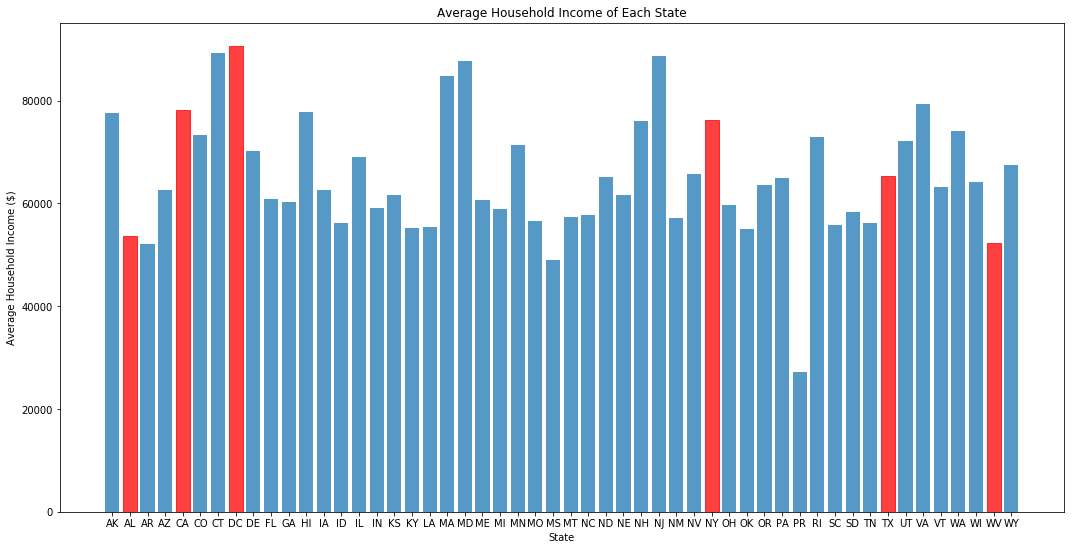

In [8]:
#formatting and labeling the graph 
plt.figure(figsize=(18,9))
plt.title("Average Household Income of Each State")
plt.ylabel("Average Household Income ($)")
plt.xlabel("State")
#making the graph
state_incomes = plt.bar(income_mean["State_ab"],income_mean["Mean"], alpha = .75)

#highlighting notable states
state_incomes[1].set_color('r')
state_incomes[7].set_color('r')
state_incomes[34].set_color('r')
state_incomes[4].set_color('r')
state_incomes[44].set_color('r')
state_incomes[50].set_color('r')

#saving and showing the graph
plt.savefig('avg_household_income.png')
plt.show()

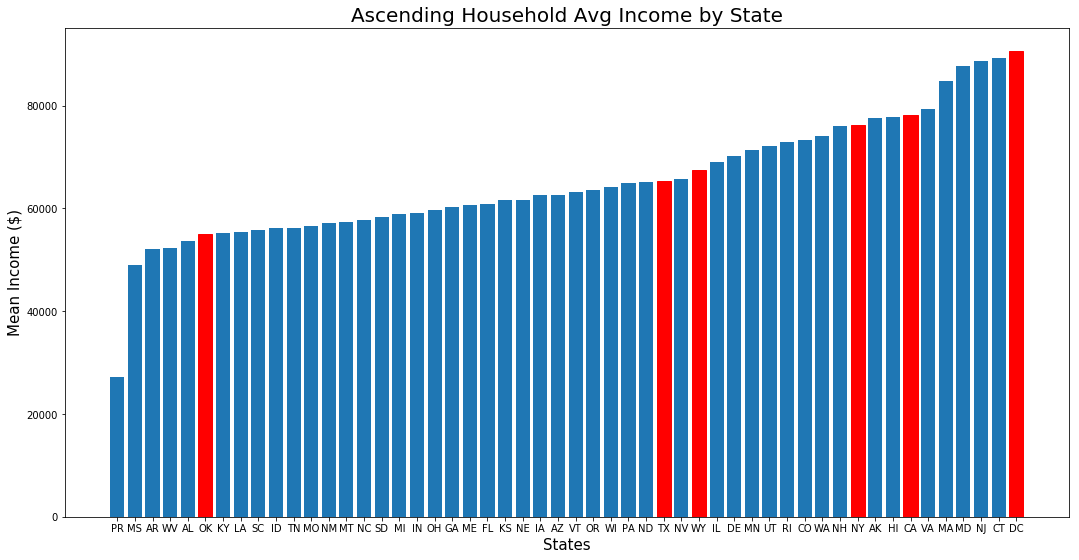

In [9]:
#formatting and labeling the graph
plt.figure(figsize=(18,9))
plt.title("Ascending Household Avg Income by State", fontsize=20)
plt.xlabel("States", fontsize=15)
plt.ylabel("Mean Income ($)", fontsize=15)

#ascend the income data
asc_im = income_mean.sort_values("Mean", ascending=True)
#graphing and highlighting notable states
asc_si = plt.bar(asc_im["State_ab"], asc_im["Mean"])
asc_si[5].set_color('r')
asc_si[31].set_color('r')
asc_si[33].set_color('r')
asc_si[42].set_color('r')
asc_si[45].set_color('r')
asc_si[51].set_color('r')
#saving and showing the graph
plt.savefig('Ascending Avg Income by State')
plt.show()

In [10]:
#summarized death df organized by state to graph with
death_summary = death_data[["State", "Deaths"]]
death_sums = death_summary.groupby("State").sum().reset_index()
death_sums["State_ab"] = ["AK","AL","AR","AZ","CA","CO","CT","DC","DE","FL","GA","HI","ID","IL","IN","IA","KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ","NM","NY","NC","ND","OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VT","VA","WA","WV","WI","WY"]
death_sums.head(10)

,State,Deaths,State_ab
0,Alabama,50519,AK
1,Alaska,3259,AL
2,Arizona,54759,AR
3,Arkansas,30031,AZ
4,California,263979,CA
5,Colorado,35199,CO
6,Connecticut,29147,CT
7,Delaware,7876,DC
8,District of Columbia,3893,DE
9,Florida,199827,FL


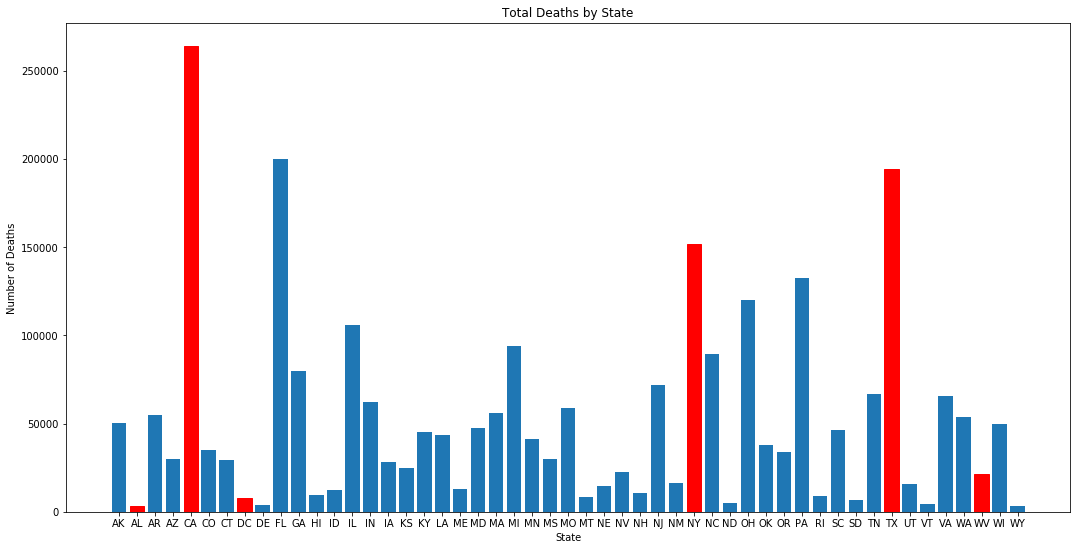

In [11]:
#formatting and labeling the graph
plt.figure(figsize=(18,9))
plt.title("Total Deaths by State")
plt.ylabel("Number of Deaths")
plt.xlabel("State")
death_graph = plt.bar(death_sums["State_ab"],death_sums["Deaths"])
#highlighting notable states
death_graph[1].set_color('r')
death_graph[7].set_color('r')
death_graph[32].set_color('r')
death_graph[4].set_color('r')
death_graph[43].set_color('r')
death_graph[48].set_color('r')
#saving and showing the graph
plt.savefig('deaths_by_state.png')
plt.show()

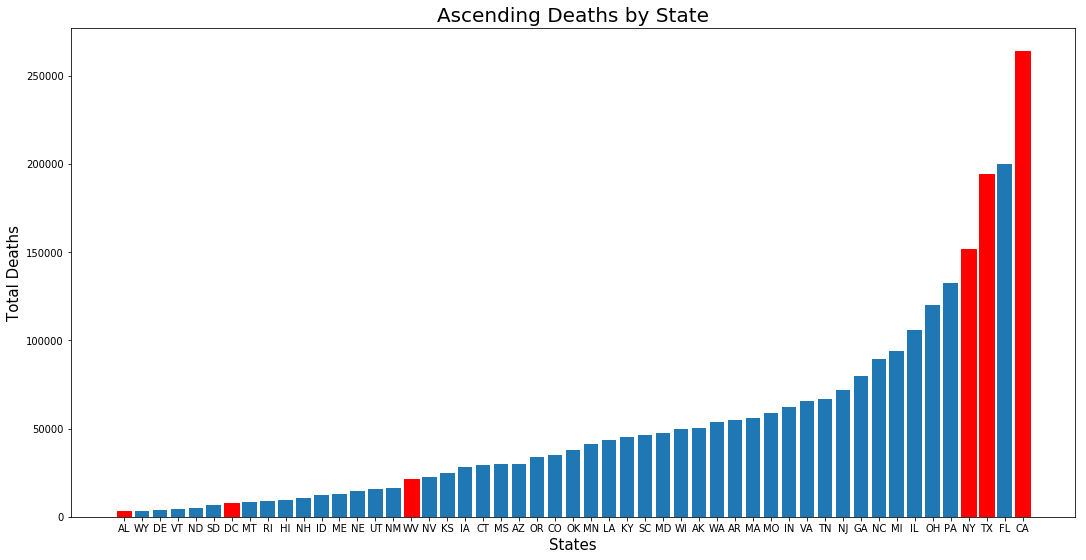

In [12]:
#formatting and labeling the graph
plt.figure(figsize=(18,9))
plt.title("Ascending Deaths by State", fontsize=20)
plt.xlabel("States", fontsize=15)
plt.ylabel("Total Deaths", fontsize=15)
#ascending the death datafram
asc_death = death_sums.sort_values("Deaths", ascending=True)
#graphing and highlighting notable states
asc_dg = plt.bar(asc_death["State_ab"], asc_death["Deaths"])
asc_dg[0].set_color('r')
asc_dg[6].set_color('r')
asc_dg[16].set_color('r')
asc_dg[47].set_color('r')
asc_dg[48].set_color('r')
asc_dg[50].set_color('r')
#saving and showing the graph
plt.savefig("Ascending Deaths by State")
plt.show()

In [13]:
#creating individual cause of death graphs for each state
#states = death_df["State"].unique()
#fig, axes = plt.subplots(2,2)
#matplotlib.use("agg")
#for counter,state in enumerate(states[0:52]):
    #current_state = death_df[death_df["State"]== state]
    #plt.figure(figsize=(18,9))
    #graph = plt.bar(current_state["Cause of death"],current_state["Deaths"])
    #plt.savefig(f"{state}.png")

In [14]:
#merging the income and death dataframes to graph
income_scatter = income_mean.drop(income_mean.index[39])
income_v_death1 = pd.merge(income_scatter,death_sums, how = 'left', on = 'State_ab')
income_v_death = pd.merge(income_v_death1,death_pop, how = 'left', on = 'State')
income_v_death.head(10)

,State_ab,Mean,Median,Stdev,State,Deaths,Population
0,AK,77670.21,108911.70,51760.07,Alabama,50519,4874747
1,AL,53612.93,62771.24,41725.64,Alaska,3259,739795
2,AR,52060.36,52381.61,40817.96,Arizona,54759,7016270
3,AZ,62578.07,79373.54,43626.82,Arkansas,30031,3004279
4,CA,78126.74,100581.73,53652.98,California,263979,39536653
5,CO,73322.82,99512.92,49529.68,Colorado,35199,5607154
6,CT,89227.22,120557.35,58091.32,Connecticut,29147,3588184
7,DC,90668.42,93759.59,62519.22,Delaware,7876,961939
8,DE,70142.34,87086.03,51072.89,District of Columbia,3893,693972
9,FL,60887.89,75203.76,45366.67,Florida,199827,20984400


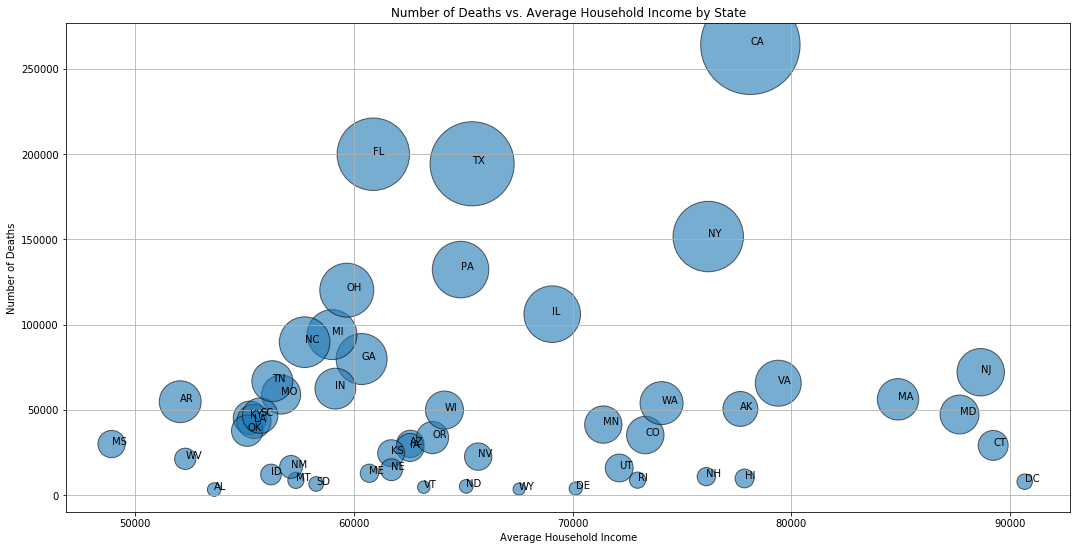

In [15]:
#labeling parts of graph and formatting
x = income_v_death['Mean']
y = income_v_death['Deaths']
n = income_v_death['State_ab']
plt.figure(figsize=(18,9))
plt.grid()
#graphing and adding titles
scatterplt = plt.scatter(income_v_death['Mean'], income_v_death['Deaths'], s=income_v_death["Population"]*.00025, alpha = .6, edgecolors = 'black')
plt.title("Number of Deaths vs. Average Household Income by State")
plt.ylabel("Number of Deaths")
plt.xlabel("Average Household Income")
#graphing the annotations
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i],y[i]))
#saving and showing the graph
plt.savefig('number_deaths_bubble.png')
plt.show()

In [16]:
#getting population percentage
income_v_death['% Population'] = income_v_death["Deaths"]/income_v_death['Population']*100
income_v_death.head()

,State_ab,Mean,Median,Stdev,State,Deaths,Population,% Population
0,AK,77670.21,108911.70,51760.07,Alabama,50519,4874747,1.036341
1,AL,53612.93,62771.24,41725.64,Alaska,3259,739795,0.440527
2,AR,52060.36,52381.61,40817.96,Arizona,54759,7016270,0.780457
3,AZ,62578.07,79373.54,43626.82,Arkansas,30031,3004279,0.999608
4,CA,78126.74,100581.73,53652.98,California,263979,39536653,0.667682


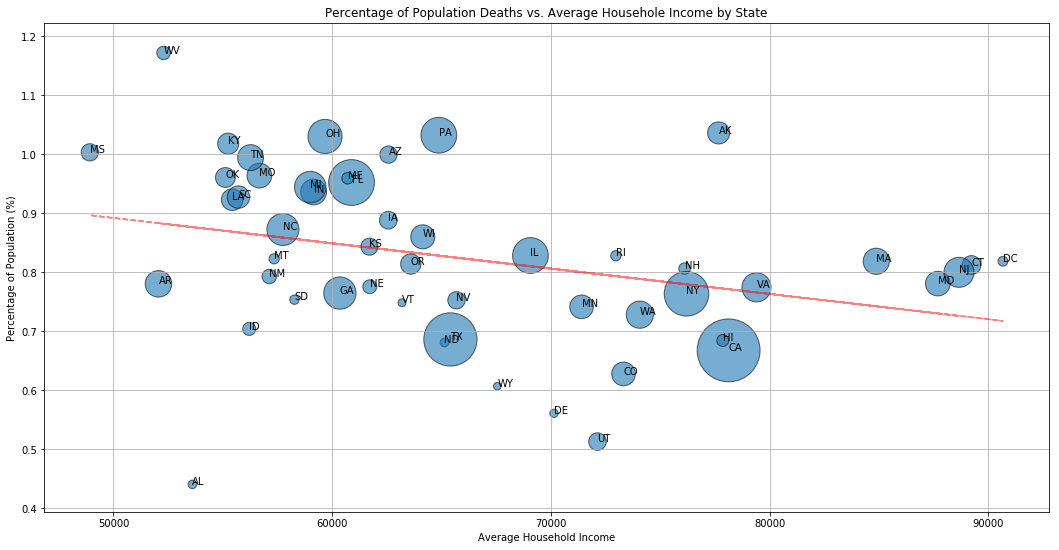

In [17]:
#labeling parts of the graph and formatting
x = income_v_death['Mean']
y = income_v_death['% Population']
n = income_v_death['State_ab']
plt.figure(figsize=(18,9))
plt.grid()
#making and adding states names to the graph
scatterplt2 = plt.scatter(income_v_death['Mean'], income_v_death['% Population'], s = income_v_death["Population"]*.0001000, alpha = .6, edgecolors = 'black')
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i],y[i]))
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--", alpha = .5)
#labeling
plt.title("Percentage of Population Deaths vs. Average Househole Income by State")
plt.ylabel("Percentage of Population (%)")
plt.xlabel("Average Household Income")
#saving and showing the graph
plt.savefig('percent_deaths_income.png')
plt.show()

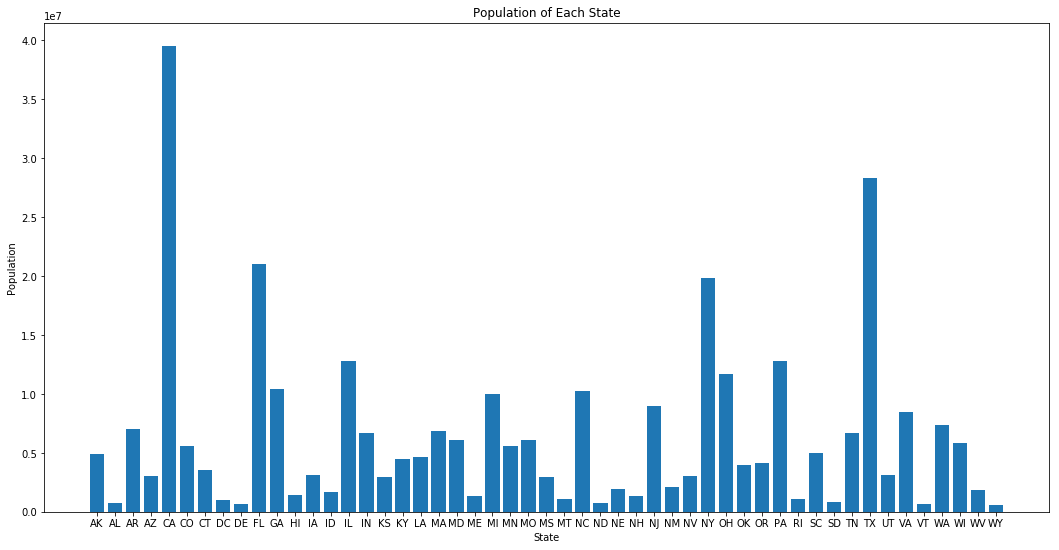

In [18]:
#formatting
plt.figure(figsize=(18,9))
#making and labeling the graph
plt.bar(income_v_death["State_ab"], income_v_death['Population'])
#plt.xlabel('Causes of Death')
#plt.ylabel('Number of Deaths')
plt.title("Population of Each State")
plt.ylabel("Population")
plt.xlabel("State")
#saving and showing the graph
plt.savefig('population.png')
plt.show()

In [19]:
#making a dataframe that finds the total deaths per cause of death
death_freq = death_df.groupby('Cause of death').sum().reset_index()
death_causes = death_freq.sort_values('Deaths', ascending = False).head(10)
death_causes

,Cause of death,Deaths,Population
106,Atherosclerotic heart disease,163655,325719178
139,"Bronchus or lung, unspecified - Malignant neop...",143090,325719178
208,"Chronic obstructive pulmonary disease, unspeci...",120600,325719178
60,"Alzheimer disease, unspecified",117257,325719178
30,"Acute myocardial infarction, unspecified",103469,325719178
977,Unspecified dementia,101934,325719178
229,Congestive heart failure,64661,325719178
105,"Atherosclerotic cardiovascular disease, so des...",63270,325719178
927,"Stroke, not specified as haemorrhage or infarc...",56243,325719178
760,"Pancreas, unspecified - Malignant neoplasms",43184,325719178


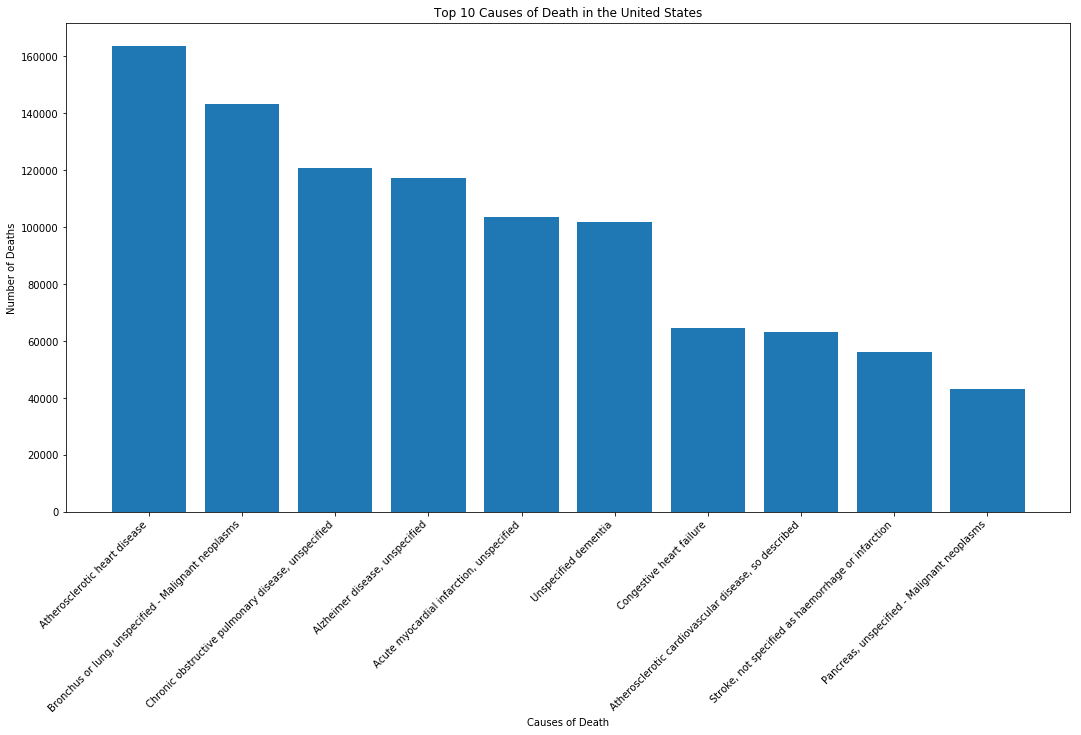

In [20]:
#formatting
plt.figure(figsize=(18,9))
#making and labeling the graph
death_causes_bar = plt.bar(death_causes['Cause of death'],death_causes['Deaths'])
plt.xticks(rotation = 45, ha="right")
plt.xlabel('Causes of Death')
plt.ylabel('Number of Deaths')
plt.title("Top 10 Causes of Death in the United States")
#saving and showing the figure
plt.savefig('top_ten_causes.png')
plt.show()